# Pyber Data Analysis

### 1. Urban area rides are more, fare is less, then comes Suburban area, after that Rural area. 
### 2. 80% of Drivers are from Urban area.
### 3. Rural area has least contribution in total fare, total rides and total drivers.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride_df = pd.merge(city_data_df, ride_data_df, how="left", on="city")

In [2]:
# sorting city_data_df (city dataframe)by city
sort_city_df = city_data_df.sort_values('city')
# sorting combined_city_ride_df (combind dataframe) by city
sorted_city_ride_df = combined_city_ride_df.sort_values('city')

## Urban data calculation

In [3]:
#Selecting data of type Urban from sorted comdined dataframe
urban_group = sorted_city_ride_df[sorted_city_ride_df.type == 'Urban']
#group by city
urban_group_city = urban_group.groupby('city')
#calculating average fare per city urban type
ur_fare = urban_group_city['fare'].mean()
ur_fare = ur_fare.round(2)
#calculating total number of rides per city in urban type
ur_rides = urban_group_city['ride_id'].count()
#calculating total number of drivers per city in urban type
urban_drivers = sort_city_df[sort_city_df.type == 'Urban']
urban_drivers = urban_drivers.set_index('city')
ur_drivers = pd.Series(urban_drivers['driver_count'])


## Suburban data calculation

In [4]:
#Selecting data of type Suburban from sorted comdined dataframe
suburban_group = sorted_city_ride_df[sorted_city_ride_df.type == 'Suburban']
#group by city
suburban_group_city = suburban_group.groupby('city')
#calculating average fare per city Suburban type
su_fare = suburban_group_city['fare'].mean()
su_fare = su_fare.round(2)
#calculating total number of rides per city in Suburban type
su_rides = suburban_group_city['ride_id'].count()
#calculating total number of drivers per city in Suburban type
suburban_drivers = sort_city_df[sort_city_df.type == 'Suburban']
suburban_drivers = suburban_drivers.set_index('city')
su_drivers = pd.Series(suburban_drivers['driver_count'])


## Rural data calculation

In [5]:
#Selecting data of type Rural from sorted comdined dataframe
rural_group = sorted_city_ride_df[sorted_city_ride_df.type == 'Rural']
#group by city
rural_group_city = rural_group.groupby('city')
#calculating average fare per city Rural type
ru_fare = rural_group_city['fare'].mean()
ru_fare = ru_fare.round(2)
#calculating total number of rides per city in Rural type
ru_rides = rural_group_city['ride_id'].count()
#calculating total number of drivers per city in Rura; type
rural_drivers = sort_city_df[sort_city_df.type == 'Rural']
rural_drivers = rural_drivers.set_index('city')
ru_drivers = pd.Series(rural_drivers['driver_count'])

## Bubble Plot of Ride Sharing Data

In [6]:
#Set plot coordinates, s1, s2, s3 multiplied by 10 to increase bubble size
# Urban coordinates
x1 = ur_rides
y1 = ur_fare
s1 = ur_drivers * 10 

# Subrban coordinates
x2 = su_rides
y2 = su_fare
s2 = su_drivers * 10 

# Rural coordinates
x3 = ru_rides
y3 = ru_fare
s3 = ru_drivers * 10 

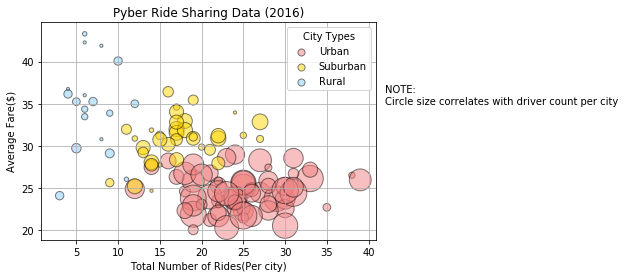

In [7]:
#Plotting bubble plot
plt.scatter(x1, y1, s1, c='lightcoral',alpha=0.5,edgecolor='black',label='Urban')
plt.scatter(x2, y2, s2, c='gold',alpha=0.5,edgecolor='black',label='Suburban')
plt.scatter(x3, y3, s3, c='lightskyblue',alpha=0.5,edgecolor='black',label='Rural')

figure=plt.legend(title= 'City Types', loc='upper right', markerscale=1)
figure.legendHandles[0]._sizes =[50]
figure.legendHandles[1]._sizes =[50]
figure.legendHandles[2]._sizes =[50]

plt.text(42,35, "NOTE: \nCircle size correlates with driver count per city")
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides(Per city)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.show()

## Total Fares by City Type

In [8]:
# Calculating total fare
total_fare = combined_city_ride_df['fare'].sum()
# Calculating total fare in Urban type
urban_fare = (urban_group['fare'].sum()).round(2)
# Calculating total fare in Suburban type
suburban_fare = (suburban_group['fare'].sum()).round(2)
# Calculating total fare in Rural type
rural_fare = (rural_group['fare'].sum()).round(2)

#Calculating % of Total Fares by City Type
ur_fare_pecent = (urban_fare/total_fare)*100
su_fare_pecent = (suburban_fare/total_fare)*100
ru_fare_pecent = (rural_fare/total_fare)*100


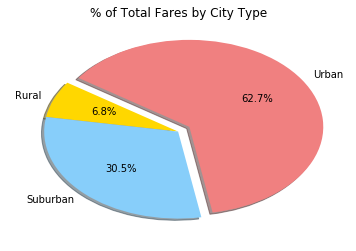

In [9]:
# Pie chart for % of Total Fares by City Type

plt.title("% of Total Fares by City Type")
city_type = ['Urban', 'Rural', 'Suburban']
fare_percent = [ur_fare_pecent, ru_fare_pecent, su_fare_pecent]
colors = ['lightcoral','gold', 'lightskyblue']
explode = (0.1, 0.0, 0)  

plt.pie(fare_percent, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.show()

## Total Rides by City Type

In [10]:
# Calculating total rides
total_rides = combined_city_ride_df['ride_id'].sum()
# Calculating total rides in Urban type
urban_rides = (urban_group['ride_id'].sum()).round(2)
# Calculating total rides in Suburban type
suburban_rides = (suburban_group['ride_id'].sum()).round(2)
# Calculating total fare in Rural type
rural_rides = (rural_group['ride_id'].sum()).round(2)

# Calculating % of Total Rides by City Type
ur_rides_pecent = (urban_rides/total_rides)*100
su_rides_pecent = (suburban_rides/total_rides)*100
ru_rides_pecent = (rural_rides/total_rides)*100

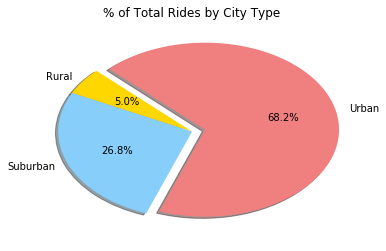

In [11]:
# Pie chart for % of Total Rides by City Type

plt.title("% of Total Rides by City Type")
city_type = ['Urban', 'Rural', 'Suburban']
rides_percent = [ur_rides_pecent, ru_rides_pecent, su_rides_pecent]
colors = ['lightcoral','gold', 'lightskyblue']
explode = (0.1, 0.0, 0)  

plt.pie(rides_percent, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.show()

## Total Drivers by City Type

In [12]:
# Calculating total drives
total_drivers = combined_city_ride_df['driver_count'].sum()
# Calculating total drivers in Urban type
urban_drivers = ur_drivers.sum()
# Calculating total drivers in Suburban type
suburban_drivers = su_drivers.sum()
# Calculating total drivers in Rural type
rural_drivers = ru_drivers.sum()

#% of Total Drivers by City Type
ur_drivers_pecent = (urban_drivers/total_drivers)*100
su_drivers_pecent = (suburban_drivers/total_drivers)*100
ru_drivers_pecent = (rural_drivers/total_drivers)*100

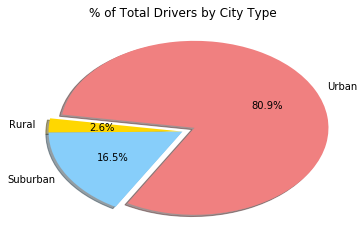

In [13]:
# Pie chart for # % of Total drivers by City Type
plt.title("% of Total Drivers by City Type")
city_type = ['Urban', 'Rural', 'Suburban']
drivers_percent = [ur_drivers_pecent, ru_drivers_pecent, su_drivers_pecent]
colors = ['lightcoral','gold', 'lightskyblue']
explode = (0.1, 0.0, 0)  

plt.pie(drivers_percent, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

plt.show()
